<a href="https://colab.research.google.com/github/donghui-0126/machine-learning/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2%EC%9E%A5%20%EB%94%A5%EB%9F%AC%EB%8B%9D/%5B14%EC%9E%A5%5D_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%BB%B4%ED%93%A8%ED%84%B0_%EB%B9%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

In [15]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("감지된 GPU가 없습니다. GPU가 없으면 CNN은 매우 느릴 수 있습니다.")

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 필터

In [16]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")/255.0

In [17]:
flower = load_sample_image("flower.jpg")/255.0
images = np.array([china,flower])
batch_size, height, width, channels = images.shape
images.shape

(2, 427, 640, 3)

In [18]:
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)
# filter[row, col, channel, filter]
filters[:, 3, :, 0] = 1 # 필터의 가운데 수직선만 1이고 나머지는 0인 수직선 필터 
filters[3, :, :, 1] = 1 # 필터의 가운데 수평선만 1이고 나머지는 0인 수평선 필터 

<function matplotlib.pyplot.show(*args, **kw)>

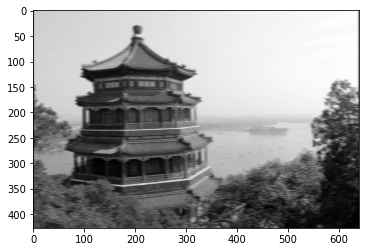

In [19]:
# images는 입력의 미니배치입니다.
# filters는 적용될 일련의 필터 이다.
# strides는 1이나 4개의 원소를 갖는 1D배열로 지정할 수 있다. 
# padding은 "VALID" 또는 "SMAE"중 하나를 지정한다. 
# VALID로 지정되면 합성곱 층에 제로 패딩을 사용하지 않는다. SAME으로 지정하면 제로패딩을 한다.
# 제로패딩을 하지 않으면 픽셀이 무시될 수도 있으니, 왠만하면 해주는게 좋을 듯 하다.

outputs= tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # 첫 번째 이미지의 두 번째 특성맵(수평선이 강조된 특성맵)을 그린다.
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

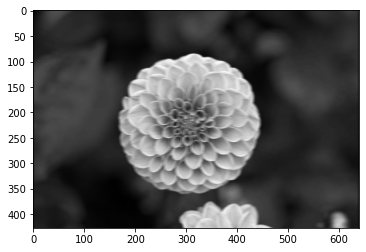

In [20]:
outputs= tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[1, :, :, 1],cmap="gray") # 첫 번째 이미지의 두 번째 특성맵(수평선이 강조된 특성맵)을 그린다.
plt.show

In [21]:
# 위에서는 필터를 직접 지정했지만 실제 CNN에서는 보통 훈련 가능한 변수로 필터를 정의한다.
# 보통 keras.layers.Conv2D를 사용한다.

# 이 코드는 3X3 크기의 필터 32개와 스트라이드 1, 제로패딩을 사용하는 Conv2D층을 만들고 출력을 위해 ReLU 활성화함수를 적용한다.
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

# 풀링층

In [22]:
# 최대 풀링층
max_pool = keras.layers.MaxPool2D(pool_size=2)

# 평균 풀링 층
avg_pool = keras.layers.AvgPool2D(pool_size=2)

In [23]:
# 깊이 방향 풀링 층
output = tf.nn.max_pool(images,
                       ksize=(1,1,1,3),
                       strides=(1,1,1,3),
                        padding="VALID")

UnimplementedError: ignored

In [ ]:
# 이를 케라스 모델의 층으로 사용하고 싶다면 LAmbda 층으로 감싸면 된다.
depth_pool = keras.layers.Lambda(
    lambda X:tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3),
                               padding="VALID"))

In [ ]:
# 전역평균 풀링 층
# 이 층은 하나의 특성맵마다 하나의 숫자를 출력한다.

global_avg_pool = keras.layers.GlobalAvgPool2D()

In [ ]:
# 이는 공간 방향을 따라 평균을 계산하는 Lambda층과 동일하다.
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_maen(X, axis=[1,2]))

# CNN 구조
합성곱 층에 너무 큰 커널을 사용하는 것은 흔히 하는 실수이다. 예를 들어 5X5 커널의 합성곱 층대신 3X3 커널 두개를 싸흔다. 파라미터와 계산량이 적고 일반적으로 더 나은 성능을 낸다. 한가지 예외는 첫번 째 합성곱 층이다. 여기서는 일반적으로 큰크기의 커널과 2 이상의 ㅡ트라이드를 사용한다. 이렇게 하면 너무 많은 정보를 잃지 않고 공간방향차원을 줄일 수 있다. 커널 크기를 늘려도 입력 이미지는 3개의 채널만 가지므로 비용이 크게 들지 않는다.

In [24]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)


# 데이터가 4D로 들어가야한다. (미니배치크기, 높이, 너비, 채널)
# 얘는 Grayscale 이므로 newaxis를 사용해서 채널을 1로 설정해준다.
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)
(55000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
# MNIST 데이터셋 문제 해결을 위한 CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                           input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])


# 아래와 같이 partial로 구현가능하다
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

X_new = X_test[:10] # 새로운 이미지처럼 사용합니다
y_pred = model.predict(X_new)

Epoch 1/5
1719/1719 [==============================] - 23s 12ms/step - loss: 0.6908 - accuracy: 0.7608 - val_loss: 0.3699 - val_accuracy: 0.8748
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4092 - accuracy: 0.8631 - val_loss: 0.3259 - val_accuracy: 0.8874
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3561 - accuracy: 0.8800 - val_loss: 0.3052 - val_accuracy: 0.8864
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3206 - accuracy: 0.8917 - val_loss: 0.3015 - val_accuracy: 0.8910
Epoch 5/5
1/1 [==============================] - 0s 88ms/step


# LeNet-5

LeNet-5 구조는 아마도 가장 널리 알려진 CNN구조일 것이다.


# AlexNet

LeNet과 비슷하지만 처음으로 합성곱 층위에 또 합성곱층을 쌓은 모델이다.

또한 과대적합을 피하기 위해 50% 비율의 드롭아웃과 데이터 증식을 사용했다. 

또한 C1과 C3 층의 ReLU 단계 후에 바로 LRN(local response normalization)이라 부르는 경쟁적인 정규화 단계를 사용했다. 가장 강하게 활성화된 뉴런이 다른 특성 맵에 있는 같은 위치의 뉴런을 억제한다. 이는 특성 맵을 각기 특별하게 다른 것과 구분되게 하고, 더 넓은 시각에서 특징을 탐색하도록 만들어 일반화 성능을 향상시킨다.

> b_i = a_i * (k + alpha * sigma{(j = j_low to j_high) a_j ^ 2) ^ (-beta)
> j_high = min(f_n, i+ r/2), j_low = max(0, i-r/2)

b는 정규화된 출력값이다. a는 정규화되기전 출력값이다.  k, alpha, beta, r은 하이퍼파라미터이다. 

만약 r=2 이고 한 뉴런이 강하게 화성화 되있다면 자신의 위와 아래의 특성 맵에 위치한 뉴런의 활성화를 억제할 것이다.

LRN은 

>tf.nn.local_response_normalization() 연산을 사용해서 구현할 수 있다.

In [27]:
# 케라스 층으로 사용하고 싶다면 람다로 감싸면 된다.

LRN_layer = keras.layers.Lambda(
    lambda X: tf.nn.local_reponse_normalization(X))

# GoogLeNet

https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14

GoogLeNet은 인셉션 모듈과 이전 CNN보다 더 깊다는 특징으로 적은 파라미터를 가지고 더 좋은 성능을 나타냈다.

# ResNet
파라미터 수를 줄이고 깊은 네트워크로 모델을 구성했다.

이게 가능했던 이유는 스킵연결이 있었기 때문이다. <br>
이것은 어떤 층에 주입되는 신호가 상위 층의 출력에도 더해진다. 



신경망을 훈련시킬 때는 목적 함수 h(X)를 모델링하는 것이 목표이다. 만약 입력 x를 네트워크의 출력에 더한다면(즉, 스킵 연결을 추가하면) 네트워크는 h(x) 대신 f(x)= h(x)-x 를 학습하게 될 것이다. 이를 잔차학습이라고 한다.

일반적인 신경망을 초기화할 때는 가중치가 0에 가깝기 때문에 네트워크도 0에 가까운 값을 출력한다. 스킵 연결을 추가하면 이 네트워크는 입력과 같은 값을 출력한다. 즉, 초기에는 항등 함수를 모델링한다. 목적함수가 항등 함수에 매우 가깝다면 훈련속도가 매우 빨라질 것이다. 

또한 스킵 연결을 많이 추가하면 일부 층이 아직 학습되지 않았더라도 네트워크는 훈련을 시작할 수 있다. 스킵 연결 덕분에 입력 신호가 전체 네트워크에 손쉽게 영향을 미치게 된다. 심층 잔차 네트워크는 스킵연결을 가진 작은 신경망인 잔차 유닛(<b>RU</b>)을 쌓은 것으로 볼 수 있다. 


ResNet의 구조는 매우 단순하다. GoogLeNet와 비슷하지만 중간에 인셉션 모듈 대신 잔차유닛을 굉장히 깊게 쌓은 것이다. 각 잔차 유닛은 배치 정규화와 ReLU, 3x3 커널을 사용하고 공간정보를 유지하는 (스트라이드 1, "same"패딩) 두 개의 합성곱 층 으로 이루어져 있다. 

특성맵의 수는 몇개의 잔차유닛 마다 두배로 늘어나고 높이와 너비는 절반이 된다. (스트라이드 2인 합성곱 층을 사용해서). 이러한 경우 입력과 출력의 크기가 다르기 때문에 입력이 잔차 유닛의 출력에 바로 더해질 수 없다. 이 문제를 해결하기 위해서 스트라이드 2이고 출력 특성맵의 수가 같으 1x1합성곱 층으로 입력을 통과시킨다. 

--------
병목층은 1 x 1 커널의 합성곱 층이다. 
- 이는 공간상의 패턴을 잡을 수는 없지만 깊이 차원을 따라 놓인 패턴을  잡을 수 있다. 즉, 깊이 차원을 줄일 수 있다.
- 입력보다 더 적은특성맵을 출력하므로 차원을 줄일 수 있다. 연산 비용과 파라미터 개수를 줄여 훈련 속도를 높이고 일반화 성능을 향상시킨다.
- 위 효과를 가지므로 층을 쌓을 때 더욱 잘 학습할 수 있다.

# Xception
GoogLeNet 구조와 비슷하지만 깊이별 분리 합성곱 층을 사용했다. 

이것은 각 공간 패턴과 채널 사이 패턴을 분리하여 모델링 할 수 있다고 한다.

일반적인 합성곱 층은 공간상의 패턴과 패널 사이의 패너을 동시에 잡기위해 필터를 사용한다. 

번외로, 인셉션층은 채널사이의 패턴만을 학습하는데 이는 분리 합성곱 층과 일반적인 합성곱 층의 중간이라고 할 수 있다.

# SENet
이 구조는 인셉션 네트워크와 ResNet 같은 기존 구조를 확장하여 성능을 높였다.

SENet는 모든 유닛(즉, 모든 인셉션 모듈이나 모든 잔차 유닛)에 SE블록이라는 작은 신경망을 추가하여 성능을 향상시켰다.

SE 블록이 추가된 부분의 유닛의 출력을 깊이 차원에 초점을 맞추어 분석한다(공간 패턴은 신경쓰지 않는다). 어떤 특성이 일반적으로 동시에 가장 크게 활성화되는지 학습한다. 그 다음에서처럼 이 정보를 사용하여 특성 맵을 보정한다. 예를 들어 SE 블록이 그림에서 함께 등장하는 입, 코, 눈을 학습할 수 있다. 우리는 사진에서 입과 코를 보았다면 눈도 볼 수 있다고 기대한다. 따라서 입과 코 특성 맵이 강하게 활성되고 눈 특성 맵만 크게 활성화 되지 않았다면 이 블록이 눈 특성 맵의 출력을 높인다(정확히 말하면 관련 없는 특성 맵의 값을 줄인다). 만약 눈이 다른 요소와 혼동된다면 이런 특성 맵 보정이 애매함을 해결할 수 있다.

하나의 SE 블록은 3개의 층으로 구성된다. 전역 평균 풀링 층과 ReLU활성화 함수를 사용하는 밀집 은닉층, 시그모이드 활성화 함수를 사용하는 밀집 출력 층이다.

전역 평균 풀링 층으로 벡터를 받아서 작은 벡터(보통은 16차원)으로 축소시킨다. 이는 특성 조합에 대한 일반적인 표현을 학습한다. 마지막으로 출력층은 이 임베딩을 받아 특성 맵마다 0과 1 사이의 하나의 숫자를 담은 보정된 벡터를 출력한다.

# 케라스를 사용해서 ResNet-34 CNN 구현하기

In [28]:
# 일단 Residual층을 만든다.
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                                   padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers= []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                       padding = "same", use_bias=False),
                keras.layers.BatchNormalization()]
        
        def call(self, inputs):
            Z = inputs
            # 입력과 메인 레이어를 이어준다.
            for layer in self.main_layers:
                Z = layer(Z)
            skip_Z = inputs
            # strides가 1보다 크면 스킵레이어에도 이어준다.
            for layer in self.skip_layers:
                skip_Z = layer(skip_Z)
                
            # 두 출력을 더해서 활성화 함수에 입력함
            return self.activation(Z + skip_Z)

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3],
                                padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64

# 리스트가 아래 박스에 담긴 코드 처럼 실행된다.
for filters in [64] * 3 + [128] * 4 + [256] * 6+ [512] * 3:
    # prev_filter와 filters가 다르면 입력 크기가 달라서 잔차유닛에 바로 더할 수 없기 때문에
    # 스트라이드가 2인 합성곱 층에 통과시키는 코드이다. 
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters,  strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [30]:
[64] * 3 + [128] * 4 + [256] * 6+ [512] * 3

[64, 64, 64, 128, 128, 128, 128, 256, 256, 256, 256, 256, 256, 512, 512, 512]

# 케라스에서 제공하는 사전훈련된 모델 사용하기

In [31]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 1s 0us/step


In [32]:
# 이 모델은 224X224 픽셀 크기의 이미지를 기대한다. 텐서플로의 tf.image.resize를 사용하면 된다.
# 이 함수는 가로세로 비율을 유지하지 않는다. 이게 문제가 된다면 tf.image.crop_and_resize함수를 사용하면된다.
images_resized = tf.image.resize(images, [224,224])

In [33]:
# 사전훈련된 모델을 이미지가 적절한 방식으로 전처리되었다고 가정한다. 경우에 따라 0 에서 1 사이 또는 -1 에서 1 사이의 입력을 기대한다. 
# 이를 위해 모델마다 이미지를 전처리해주는 preptocess_input()함수를 제공한다. 
# 이 함수는 픽셀값이 0에서 255사이라고 가정한다. 따라서 images_resized에 255를 곱해야한다.

inputs = keras.applications.resnet50.preprocess_input(images_resized*255)

In [34]:
# Y_proba는 행이 하나의 이미지이고 열이 하나의 클래스인 행렬이다.
Y_proba = model.predict(inputs)

1/1 [==============================] - 1s 1s/step


In [35]:
# decode_predictions를 사용하면 클래스 예측확률을 리턴해준다.
# class_id, name, y_proba를 담은 튜플형태로 리턴한다.
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)
for image_index in range(len(images)):
    print("이미지 #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print(" {} - {:12s} {:.2f}%".format(class_id, name, y_proba*100))
        print()

35363/35363 [==============================] - 0s 0us/step
이미지 #0
 n02825657 - bell_cote    82.35%

 n03877845 - palace       6.75%

 n03781244 - monastery    4.19%

 n02980441 - castle       3.16%

 n03028079 - church       1.00%

이미지 #1
 n03530642 - honeycomb    49.83%

 n13040303 - stinkhorn    33.95%

 n02206856 - bee          4.35%

 n11939491 - daisy        3.23%

 n12985857 - coral_fungus 2.66%



# 사전훈련된 모델을 사용한 전이 학습

충분하지 않은 훈련뎅터로 이미지 분류기를 훈련하려면 11장에서 언급한 것처럼 사전훈련된 모델의 하위층을 사용하는 것이 좋다. 예를 들어 사전훈련된 Xception 모델을 사용해 꽃 이미지를 분류하는 모델을 훈련해보겠다. 

In [36]:
# 13장 데이터 적재와 전처리 파트와 관련이 있는 코드기 때문에 대충 넘어가겠다.
import tensorflow_datasets as tfds

# with_info=Ture로 지정하면 데이터셋에 대한 정보를 얻을 수 있다. 
# 여기에선 데이터셋의 크기와 클래스의 이름을 얻는다. 
# 이 데이터 셋에는 "train"세트만 있고 테스트 세트나 검증 세트는 없다.
# 따라서 훈련세트를 나누어야 한다. 
# TF데이터 셋에는 이를 위한 API가 제공된다. 
# 예를 들어 데이터셋의 처음 10% 를 테스트 세트로 사용하고 다음 15%를 검증세트 나머지 75%를 훈련 세트로 나눈다.
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
classes_names = info.features["label"].names
n_classes = info.features["label"].num_classes

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [37]:
test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10,15,75])

test_set = tfds.load("tf_flowers", split=test_split, as_supervised=True)
valid_set = tfds.load("tf_flowers", split=valid_split, as_supervised=True)
train_set = tfds.load("tf_flowers", split=train_split, as_supervised=True)

AttributeError: ignored

위 subsplit 메서드는 더이상 사용하지 않는 메서드라고 한다..

https://www.tensorflow.org/datasets/splits

위 링크에 나온 방법으로 코드를 짜면 될 것 같다.

In [38]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
dataset_size = info.splits["train"].num_examples

In [39]:
# tf_flowers 데이터는 train 세트만 있어서 train세트로만 데이터를 분할했다.

test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

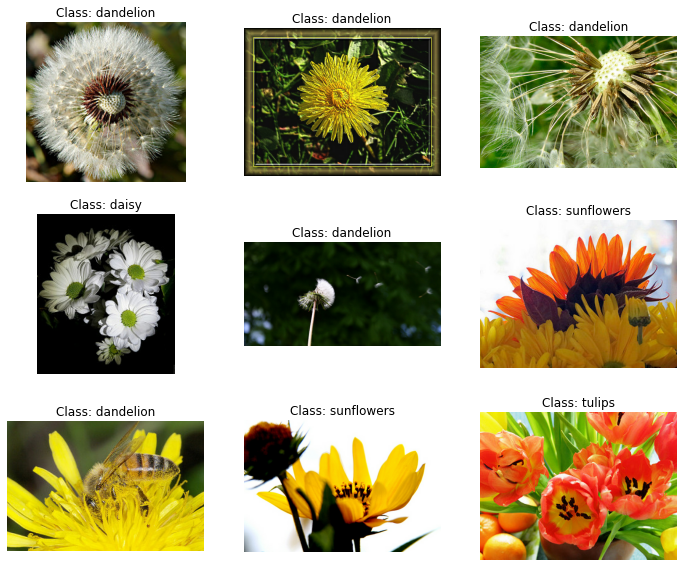

In [40]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [41]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [42]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map((preprocess)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [43]:
# Xception 모델을 로드한다. include_top=False로 지정해서 최상층에 해당하는 전역 평균 풀링층과 밀집 출력층을 제외시킨다.
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                 include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 1s 0us/step


In [44]:
# 11장에서 설명한 것 처럼 훈련 초기에는 사전훈련된 층의 가중치를 동결하는 것이 좋다.
for layer in base_model.layers:
    layer.trainable = False

# base_model 객체 자체를 사용하는 것이 아니라,
# 기반 모델의 층을 직접 사용하기 때문에 base_model.trainable=False로 지정해도 소용없다.

In [45]:
# 마지막으로 모델을 컴파일하고 훈련을 시작한다.
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
             metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 19s 170ms/step - loss: 1.9845 - accuracy: 0.7733 - val_loss: 1.0912 - val_accuracy: 0.8730
Epoch 2/5
86/86 [==============================] - 14s 159ms/step - loss: 0.5634 - accuracy: 0.9070 - val_loss: 0.9630 - val_accuracy: 0.8675
Epoch 3/5
86/86 [==============================] - 14s 158ms/step - loss: 0.2819 - accuracy: 0.9368 - val_loss: 0.7697 - val_accuracy: 0.8766
Epoch 4/5
86/86 [==============================] - 13s 156ms/step - loss: 0.1534 - accuracy: 0.9575 - val_loss: 0.7476 - val_accuracy: 0.8820
Epoch 5/5
86/86 [==============================] - 14s 160ms/step - loss: 0.0987 - accuracy: 0.9702 - val_loss: 0.7987 - val_accuracy: 0.8838


모델을 몇 번의 에포크 동안 훈련하면 검증 정확도가 75~80%에 도달하고 더 나아지지 않을 것이다. 이는 새로 추가한 최상위 층이 잘훈련되었다는 것을 의미한다. 따라서 이제 모든 층의 동결을 해제하고 훈련을 계속한다. (층을 동결하거나 해제할 때 모델을 다시 컴파일 해야한다).
이때는 사전훈련된 가중치가 훼손되는것을 피하기 위해 훨씬 작은 학습률을 사용한다.

In [46]:
for layer in base_model.layers:
    layer.trainable=True

# decay는 에포크마다 학습률이 줄어드는 정도이다.
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
             metrics=["accuracy"])
history = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
86/86 [==============================] - 61s 644ms/step - loss: 0.4310 - accuracy: 0.8746 - val_loss: 0.4028 - val_accuracy: 0.8947
Epoch 2/5
86/86 [==============================] - 55s 635ms/step - loss: 0.0666 - accuracy: 0.9771 - val_loss: 0.2946 - val_accuracy: 0.9002
Epoch 3/5
86/86 [==============================] - 55s 635ms/step - loss: 0.0267 - accuracy: 0.9898 - val_loss: 0.2394 - val_accuracy: 0.9310
Epoch 4/5
86/86 [==============================] - 55s 639ms/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 0.2629 - val_accuracy: 0.9310
Epoch 5/5
86/86 [==============================] - 55s 636ms/step - loss: 0.0205 - accuracy: 0.9956 - val_loss: 0.2834 - val_accuracy: 0.9365


# 분류와 위치 추정

10장에서 언급한 것처럼 사진에서 물체의 위치를 추정하는 것은 회귀 작업으로 나타낼 수 있다. 물체 주위의 바운딩 박스를 예측하는 일반적인 방법은 물체 중심의 수평, 수직 좌표와 높이, 너비를 예측하는 것이다. 즉 네개의 숫자를 예측해야한다. 이 때문에 모델을 크게 바꿀 필요는 없다. (일반적으로 전역 평균 풀링 층 위에)네 개의 유닛을 가진 두 번째 밀집 출력 층을 추가하고 MSE손실을 사용해 훈련한다.

In [47]:
base_model = keras.applications.Xception(weights="imagenet",
                                        include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes, activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.Model(inputs=base_model.input,
                    outputs=[class_output, loc_output])
model.compile(loss=["sparse_categorical_crossentropy", "mse"],
             loss_weights=[0.8,0.2], # 어느 것이 더 중요한지에 따라서 달라진다.
             optimizer=optimizer, metrics=["accuracy"])

- loss_weights: Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. The loss value that will be minimized by the model will then be the weighted sum of all individual losses, weighted by the loss_weights coefficients. If a list, it is expected to have a 1:1 mapping to the model's outputs. If a dict, it is expected to map output names (strings) to scalar coefficients.

여기에는 한가지 문제가 있다. 바운딩 박스를 가지려면 레이블을 만들어야한다. 

그런데 레이블을 만드는 것은 머신러닝 프로젝트에서 가장 어렵고 비용이 많이 드는 작업중 하나이다. 

도서에는 많은 유료, 무료 라벨링 사이트를 알려주었고, 경우에 따라서는 클라우드소싱플랫폼을 고려해 볼 수 있다고 했다.

크라우드소싱이란 기업활동의 전 과정에 소비자 또는 대중이 참여할 수 있도록 일부를 개방하고 참여자의 기여로 기업활동 능력이 향상되면 그 수익을 참여자와 공유하는 방법이다.

하지만 크라우드 소싱을 사용하는 데에는 여러 노력이 필요하다. 

[이 논문](https://homl.info/crowd) 에서는 컴퓨터 비전에서 크라우드 소싱에 관한 매우 실용적인 내용이 적혀있다.

아아아아아주 간단하게 논문을 읽어봤는데, 논문은 대충 이런 말을 하는 것 같다.
- 크라우드소싱을 할 때 어떻게 응답자에게 설문을 주고 어떤식으로 라벨링을 할 것인지에 대해서 말해준다.
- 결론에서는 크라우드소싱이 효율적이긴 하지만 인적결함을 있음을 시사하고, 컴퓨터 비전이 다른 분야와 더 통합되고 크라우드소싱이 더 발전한다면 컴퓨터 비전 분야또한 발전할 것이라고 말한다.

----------
다시 꽃데이터 셋으로 돌아오자<br>
꽃 데이터셋의 모든 이미지에 대해 바운딩 박스가 준비되었다고 가정해보자. 클래스 레이블, 바운딩 박스와 함께 전처리된 이미지의 배치가 하나의 원소인 데이터셋을 만들어야한다. 각 원소는 (images, (class_labels, bounding_boxes)) 형태의 튜플이 된다. <Br>


--------------
<b>바운딩 박스의 높이와 너비는 물론 수평과 수직 좌표의 범위를 0~1 사이로 정규화 해야한다. 또한 일반적으로 손실함수는 수평, 수직좌표의 오차를 제곱하고 높이, 너비 제곱근의 오차를 제곱하여 사용하기 때문에 작은 바운딩 박스에서 10픽셀 오차가 큰 바운딩 박스의 10픽셀 오차보다 더 많은 벌칙을 받는다.</b>

그 이유를 적어보겠다.
1. 제곱근함수는 값이 작을수록 더 급격하게 줄어든다. 
2. 바운딩박스의 크기(즉, 객체의 크기)는 높이와 너비가 결정한다. 
이기 때문이다.

예를 들어보자면
1. (예측너비, 실제너비) -> (1, 4) -> error = (|1 - 2|)^2 = 1
2. (예측너비, 실제너비) -> (100, 121) -> error = (|10 - 11|)^2 = 1

두 예측의 절대값 차이는 3 과 21인데, 제곱근 오차는 둘 모두 1이다. <br>이것은 너비와 높이가 크다면 상대적으로 오차가 적게 나온다는 것을 의미한다.  

---- 
MSE는 모델을 훈련하기 위한 손실 함수로 사용할 수 있지만 모델이 바운딩 박스를 얼마나 잘 예측하는지 평가하는 데에는 아주 좋지는 않다.
바운딩 박스에 널리 사용되는 지표는 ioU(intersection over union)이다. 이 값은 예측한 바운딩 박스와 타깃 바운딩 박스 사이에 중첩되는 영역을 전체 영역으로 나눈 것이다. 
> tf.keras.merics.MeanIoU

로 사용할 수 있다.

하나의 물체를 분류하고 위치를 잘 추정했지만 이미지에 여러 물체가 들어있는 경우는 어떻게 해야할까?

# 객체탐지

하나의 이미지에서 여러 물체를 분류하고 위치를 추정하는 작업을 객체 탐지 라고 한다. 

몇년 전까지 사용되던 방식은 이미지를 격자로 나누고 CNN의 크기를 바꾸어가며(객체의 크기가 다를 수있으므로) 이미지를 순회환 후에 같은 객체를 가르키는 바운딩 박스를 없애는 방식이었다. 

하지만 완전 합성곱 신경망(Fully Convolution network)(FCN)을 사용하면 CNN을 훨씬 빠르게 이미지에 슬라이딩 시킬 수 있다.

# 완전 합성곱 신경망(FCN)

FCN은 CNN맨 위의 dense layer를 CNN으로 바꿀 수 있다는 원리를 사용한다. 

예를 들자면 7x7 크기(커널크기가 아니라 feature map 크기) 100개의 특성 맵을 출력한느 합성곱 층 위에 뉴런이 200개인 밀집 층이 있다고 하자. 각 뉴런은 합성곱 층에서 출력된 100x7x7 크기의 활성화 값에 대한 가중치 합을 계산한다. 이 밀집 층을 <b>7x7 크기의 필터 200개</b>와 "valid" 패딩을 사용하는 합성곱 층으로 바꾸면 이 층은 1x1 크기의 특성 맵 200개를 출력할 것이다. 

이렇게 하면 밀집층과 동일하게 200개의 숫자가 출력 된다. 이 숫자들은 밀집층이 만드는 숫자와 완전히 동일하다. 유일한 차이는 Dense Layer의 출력은 [배치크기, 200] 크기의 텐서이고 합성곱 층은 [배치 크기, 1, 1,200] 크기의 텐서를 출력한다.

-----
위와 같이 FNC는 이미지를 딱 한번만 보고 예측을 만들어 낼 수 있다. (자세한 설명은 책에 있는데, 그것을 참고 하겠다.)

# YOLO

[이 블로그](https://mickael-k.tistory.com/m/27) 에서 많은 도움을 받았습니다.

YOLO 알고리즘은 내가 이 책을 공부하기 전부터 알고 있던 알고리즘이다. 카페사진감성분석 프로젝트에서 YOLO알고리즘을 사용해보려고 했다가 안했기 때문에 어느정도는 알고 있었다. 

YOLO알고리즘의 원리는 몰랐기 때문에 여기서는 원리에 대해서 설명하겠다.

YOLO 알고리즘은 FCN을 베이스로 하고 추가적인 기법들이 들어간 알고리즘 인 것 같다.<br>
YOLO알고리즘의 특별한 점은 (예측 클래스는 2개라고 가정하겠다.)

-------------
1. 앵커박스를 가진다. 

사용자는 모델 학습전에 적절한 앵커박스의 개수를 정해줄 수 있다. 앵커박스는 k-mean 알고리즘을 훈련 세트 바운딩 박스의 높이와 너비에 적용한다.  각 격자마다 앵커박스의 개수 만큼 앵커박스와 비슷한 크기를 가진 객체를 찾는다. 앵커박스가 격자 밖으로 나가도 되지만 앵커박스의 중심점은 격자 내부에 있어야한다. 

모델은 각 격자마다 <br>
[앵커박스1 시작점, 앵커박스1 끝점, 앵커박스1 높이, 앵커박스1 너비, 클래스1의 존재확률,클래스2의 존재확률,<br>
앵커박스2 시작점, 앵커박스2 끝점, 앵커박스2 높이, 앵커박스2 너비, 클래스1의 존재확률, 클래스2의 존재확률]<br>
를 파라미터로 가지게 된다.

앵커박스는 객체를 찾을 때 마다 적절한 크기로 전환된다. 그리고 같은 클래스를 예측한 것 중에 가장 클래스 확률이 높은 것만을 남긴다.

----------------
2. 여러스케일을 가진 이미지를 사용하여 훈련한다. 

훈련하는 동안 몇 번의 배치마다 랜덤하게 새로운 이미지 차원을 선택한다. 이를 통해 네트워크가 다른 스케일의 객체를 감지하는 방법을 학습한다.

# mAP
객체 탐지에서 사용하는 평가 지표는 mAP이다. 

이것은 재현율과 정밀도와 관련있는 지표이다. 통상적으로는 재현율/정밀도 트레이드 오프라고 칭하지만, 재현률이 낮을 때에는 재현률과 정밀도가 동시에 상승할 수 있다. 이것이 mAP 지표가 만들어진 이유 중 하나이다. 

mAP지표는 재현률을 점점 높혀나가거나 특성 재현률에서 가장 높은 정밀도를 측정하고 평균을 내는 것이다. 

또한 객체 탐지 시스템에서는 올바른 측정의 애매함이 있다. 왜냐하면 클래스는 제대로 예측했지만 바운딩박스가 다른 곳을 가르키면 잘못된 예측이기 때문이다. 애매함을 해결하기 위해서 IOU임계점을 정의한다. 바운딩 박스가 IOU임계점 보다 낮다면 틀린 예측이라고 하고, 바운딩 박스가 IOU임계점 보다 높다면 옳은 예측이라고 하는 것이다. 

임계값이 50%인 경우에는 일반적으로 mAP@0.5 라고 표기한다. 

# 시맨틱 분할
시맨틱 분할에서 각 칙셀은 픽셀이 속한 객체의 클래스로 분류된다. <br>
이 작업에서 가장 어려운 점은 이미지가 일반적인 CNN을 통과할 때 점진적으로 위치 정보를 잃는 것이다.

객체 탐지를 위해CNN을 FCN으로 변환을 해도 전체 스트라이드는 32이다. 이는 마지막 층이 입력 이미지보다 32배나 작은 특성 맵을 출력한다는 뜻이다. 이는 너무 듬성듬성하다. 따라서 해상도를 32배로 늘리는 업샘플링 층을 하나 추가한다. 

업생플링층은 전치 합성곱층을 사용하면된다. 이 층은 입력이미지 사이에 0을 끼워넣어서 입력이미지 크기를 늘린후에 합성곱층을 통과시키는 것이다. 이 방법만 사용하는 것은 정확도가 떨어지기 때문에 스킵연결(크기가 줄어들기 전 이미지를 연결함)을 사용해서 해상도를 더 키울 수 있다. 

# 연습문제 